# Data engineering

- Data cleaning for cryptocurrency price: delete rows with zero prices

In [21]:
import pandas as pd

FROM_DATA_DIR = '../raw_data/'
TO_DATA_DIR = '../cleaned_data/'
crypto = ['ADA', 'ALGO', 'ATOM', 'AVAX', 'BCH', 'BTC', 'CRO', 'DAI', 'DOGE', 'DOT',
            'ETH', 'FTM', 'HBAR', 'LEO', 'LINK', 'LTC', 'LUNA', 'MATIC', 'NEAR', 'OKB',
            'SHIB', 'SOL', 'TRX', 'UNI', 'USDC', 'USDT', 'UST', 'WBTC', 'XLM', 'XRP']
currency = ['CHF', 'CNY', 'EUR', 'GBP', 'JPY', 'USD']
metainfo = '_5000_2022-03-04'
for i in crypto:
    for j in currency:
        filename = i+'_'+j+'_'
        df = pd.read_csv(FROM_DATA_DIR+filename+'5000_2022-03-04.csv')
        df = df.loc[(df!=0).all(axis=1)]
        df.to_csv(TO_DATA_DIR+filename+str(df.shape[0])+'.csv')

- Correlation analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_DIR = '../cleaned_data/'

In [2]:
ada = pd.read_csv(DATA_DIR+'ADA_CHF_1615.csv')
algo = pd.read_csv(DATA_DIR+'ALGO_CHF_987.csv')
ada = pd.read_csv(DATA_DIR+'ADA_CHF_1615.csv')
atom = pd.read_csv(DATA_DIR+'ATOM_CHF_1046.csv')
avax = pd.read_csv(DATA_DIR+'AVAX_CHF_528.csv')
bch = pd.read_csv(DATA_DIR+'BCH_CHF_1676.csv')
btc = pd.read_csv(DATA_DIR+'BTC_CHF_2962.csv')
cro = pd.read_csv(DATA_DIR+'CRO_CHF_1084.csv')
dai = pd.read_csv(DATA_DIR+'DAI_CHF_1409.csv')
doge = pd.read_csv(DATA_DIR+'DOGE_CHF_2701.csv')

In [3]:
ada['close'].corr(algo['close'])

0.8314696854399102

In [5]:
corr = ada.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Unnamed: 0.1,time,high,low,open,volumefrom,volumeto,close
Unnamed: 0,1.000000,1.000000,-1.000000,-0.636056,-0.643573,-0.640845,0.288769,-0.135401,-0.640337
Unnamed: 0.1,1.000000,1.000000,-1.000000,-0.636056,-0.643573,-0.640845,0.288769,-0.135401,-0.640337
time,-1.000000,-1.000000,1.000000,0.636056,0.643573,0.640845,-0.288769,0.135401,0.640337
high,-0.636056,-0.636056,0.636056,1.000000,0.997857,0.996562,-0.153761,0.509829,0.999303
low,-0.643573,-0.643573,0.643573,0.997857,1.000000,0.997476,-0.162756,0.474217,0.998537
open,-0.640845,-0.640845,0.640845,0.996562,0.997476,1.000000,-0.160800,0.485172,0.997190
volumefrom,0.288769,0.288769,-0.288769,-0.153761,-0.162756,-0.160800,1.000000,0.332994,-0.157847
volumeto,-0.135401,-0.135401,0.135401,0.509829,0.474217,0.485172,0.332994,1.000000,0.497078
close,-0.640337,-0.640337,0.640337,0.999303,0.998537,0.997190,-0.157847,0.497078,1.000000


<AxesSubplot:>

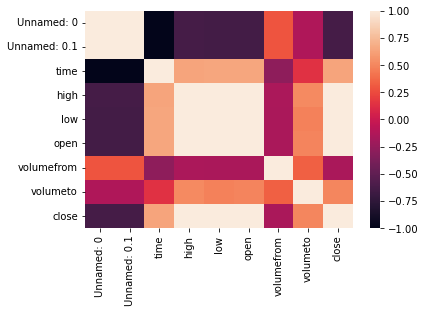

In [6]:
sns.heatmap(ada.corr())

<AxesSubplot:xlabel='close', ylabel='close'>

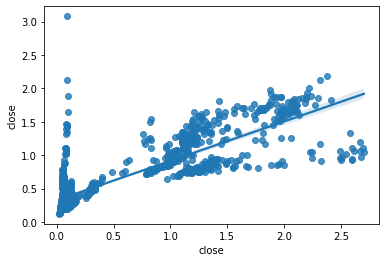

In [9]:
sns.regplot(x=ada.close[: 987], y=algo.close)

In [14]:
# Interactive visualization of crypro prices
import plotly.graph_objects as go
def crypto_price(df):
    fig = go.Figure(data=[go.Candlestick(x=df['date'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close'])])
    fig.update_layout(
        title='',
        yaxis_title='Price',
    )
    return fig

crypto_price(ada)

In [18]:
import plotly.express as px
fig = px.bar(avax, x='date', y="close")
fig.show()